# imports and defs

In [1]:
import utility_module_2_v_3 as uu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from netCDF4 import Dataset
import numpy.ma as ma


path_imd='/media/vikram/subimal/Raw_Data/IMD_DATA/'
path_gcm = '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/'


In [2]:
st=1951
en=2005
# Nyears_train =en -st +1
# Nyears_test = Nyears_train


data_bounds=[65, 40, 100, 5]

map_bounds= data_bounds
mp_spacing=10


# Read IMD data

In [3]:
data_bounds=[65, 40, 100, 5]
st=1951
yr_split = 1975
en=2005

data_obs_imd_max=uu.extract_imd_temp(st,en,path_imd+'/max_temp_pt1/max_temp_',data_bounds)
data_obs_imd_min=uu.extract_imd_temp(st,en,path_imd+'/min_temp_pt1/min_temp_',data_bounds)


#Fixed till here

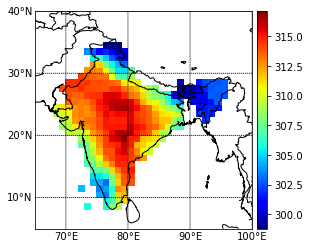

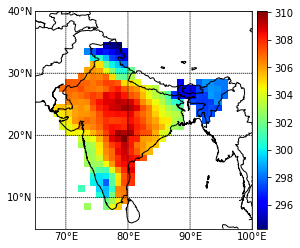

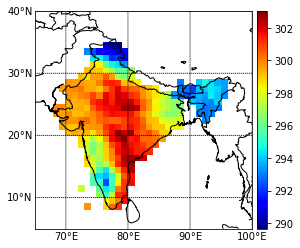

In [4]:
tas_obs=273.15 + ( data_obs_imd_max[0] + data_obs_imd_min[0])  *0.5

lat_obs=data_obs_imd_max[1]
lon_obs=data_obs_imd_max[2]

map_bounds=data_bounds#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(data_obs_imd_max[0][500,:,:]+273.15,lat_obs,lon_obs,map_bounds,mp_spacing=10)
plt.figure()
uu.map_plot_cyl(tas_obs[500,:,:],lat_obs,lon_obs,map_bounds,mp_spacing=10)
plt.figure()

uu.map_plot_cyl(data_obs_imd_min[0][500,:,:]+273.15,lat_obs,lon_obs,map_bounds,mp_spacing=10)

mask_fine_obs = np.any(np.isnan(tas_obs),axis = 0 )

In [5]:
lat_obs.shape

(31,)

## Read data

## Check

/tmp/ipykernel_224155/3919618440.py:3: RuntimeWarning: Mean of empty slice
  uu.map_plot_cyl(np.nanmean(tas_obs[:,:,:],axis=0),lat_obs,lon_obs,map_bounds,mp_spacing=10)


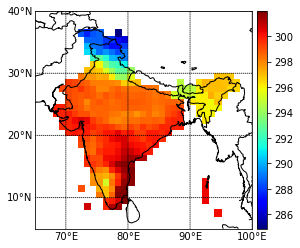

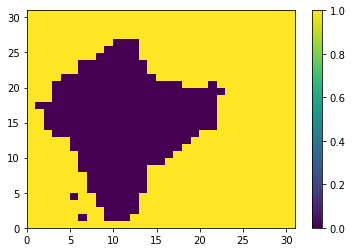

In [6]:
# plot spatial
mp_spacing=10
uu.map_plot_cyl(np.nanmean(tas_obs[:,:,:],axis=0),lat_obs,lon_obs,map_bounds,mp_spacing=10)

# plot 1
plt.plot(tas_obs[:12*5,15,15])
plt.plot(tas_obs[-12*5:,15,15])


# plot mask
plt.figure()
plt.pcolor(mask_fine_obs)
plt.colorbar()

/tmp/ipykernel_224155/4218877463.py:1: RuntimeWarning: Mean of empty slice
  mask_fine_obs = np.nanmean(tas_obs[:,:,:],axis=0)/np.nanmean(tas_obs[:,:,:],axis=0)


238398.0


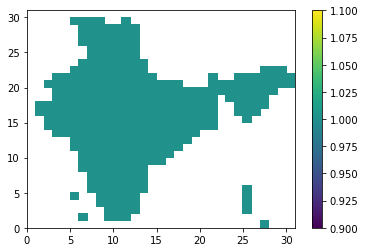

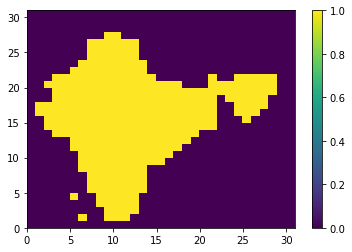

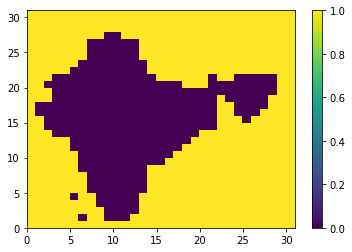

In [7]:
mask_fine_obs = np.nanmean(tas_obs[:,:,:],axis=0)/np.nanmean(tas_obs[:,:,:],axis=0)
plt.figure()
plt.pcolor(mask_fine_obs)
plt.colorbar()


def check_for_nans_infs_zeros(data_sts):
    print('Nans:',np.sum(np.isnan(data_sts)))
    print('Infs:' ,np.sum(np.isinf(data_sts)))
    print('Zeros:',np.sum((data_sts==0)))
    
dnn =np.nansum(np.sum(np.isnan(tas_obs),axis= 0) * mask_fine_obs)

print(dnn)
plt.figure()

plt.pcolor((np.sum(np.isnan(tas_obs),axis= 0) * mask_fine_obs)  < 100)

plt.colorbar()
mask_fine_obs  = ~( (np.sum(np.isnan(tas_obs),axis= 0) * mask_fine_obs)  < 100)

plt.figure()
plt.pcolor(mask_fine_obs)
plt.colorbar()

mask_fine_obs_nan_1 = ~mask_fine_obs
mask_fine_obs_nan_1[mask_fine_obs_nan_1==0]  = np.nan

## Fill mask

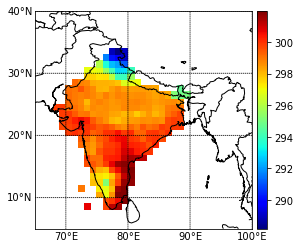

In [8]:
uu.map_plot_cyl(np.mean(tas_obs,axis=0),lat_obs,lon_obs,map_bounds,mp_spacing=10)

def create_distance_matrix(M,N,ii,jj):
  D=np.ones((M,N))*10000000
  for i in range(M):
    for j in range(N):
      D[i,j]=np.abs(i-ii)**2+0.1*np.abs(j-jj)**2
  return D

N1=tas_obs.shape[1]
N2=tas_obs.shape[2]

data_new=tas_obs+0.0001

for i in range(N1):
  for j in range(N2):
    if mask_fine_obs[i,j]==1:
        
      a=create_distance_matrix(N1,N2,i,j)+1000000*mask_fine_obs
      i_min,j_min= np.unravel_index(a.argmin(), a.shape)
      data_new[:,i,j]=tas_obs[:,i_min,j_min]




<Figure size 432x288 with 0 Axes>

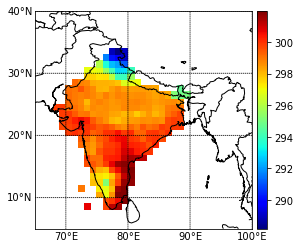

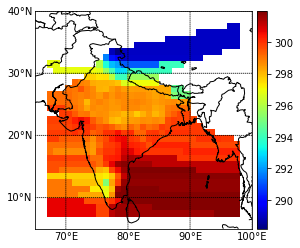

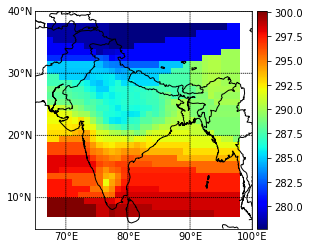

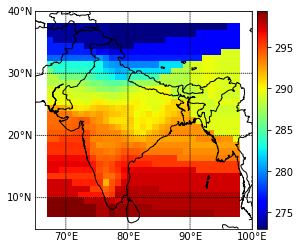

<Figure size 432x288 with 0 Axes>

In [9]:

uu.map_plot_cyl(np.mean(tas_obs,axis=0),lat_obs,lon_obs,map_bounds,mp_spacing=10)
plt.figure()
uu.map_plot_cyl(np.mean(data_new,axis=0),lat_obs,lon_obs,map_bounds,mp_spacing=10)
plt.figure()

uu.map_plot_cyl(data_new[1,:,:],lat_obs,lon_obs,map_bounds,mp_spacing=10)
plt.figure()

uu.map_plot_cyl(data_new[7,:,:],lat_obs,lon_obs,map_bounds,mp_spacing=10)
plt.figure()




In [10]:

tas_obs=data_new
del data_new

# Read GCM

In [11]:
from netCDF4 import Dataset

date_ts=pd.date_range(start=str(st)+'-01-01',end=str(en)+'-12-31')
print(date_ts[0],date_ts[-1])
N=date_ts.shape[0]
print("N:1901-2005::",st,en,N,105*(365.25))

1951-01-01 00:00:00 2005-12-31 00:00:00
N:1901-2005:: 1951 2005 20089 38351.25


## MIROC_ESM

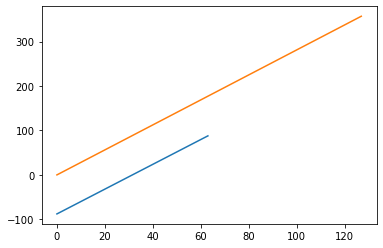

In [13]:
# reading file(s)
gcm_name='MIROC_ESM'
filename =  path_gcm +'/MIROC_ESM/tas_day_MIROC-ESM_historical_r1i1p1_18500101-20051231.nc'
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
plt.plot(lats)
plt.plot(lons)
# cropping the study area out
l_lat,u_lat,lat_gcm=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm=uu.find_bounds(lons,data_bounds[0],data_bounds[2])

# cropping years before 1901
st_gcm=1850
dt_data_st=np.datetime64(str(st_gcm)+'-01-01')
dt_st=np.datetime64(str(st)+'-01-01')
index_of_st=((dt_st- dt_data_st) / np.timedelta64(1, 'D')).astype(int)

data_gcm_daily = fh.variables['tas'][index_of_st:,l_lat:u_lat+1,l_lon:u_lon+1].data



In [14]:
print(data_gcm_daily.shape,lat_gcm.shape,lon_gcm.shape,st_gcm)

(20089, 14, 14) (14,) (14,) 1850


## CanESM
Input file 
- contains one file \
- no leap year

20075 == 38325


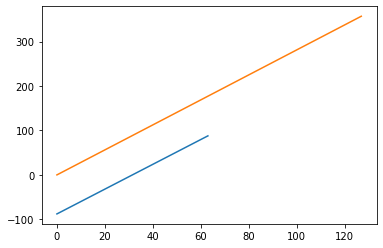

In [24]:
# reading file(s)
gcm_name='CanESM2'
filename = path_gcm + '/CanESM2/tas_day_CanESM2_historical_r1i1p1_18500101-20051231.nc'
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
plt.plot(lats)
plt.plot(lons)
# cropping the study area out
l_lat,u_lat,lat_gcm=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm=uu.find_bounds(lons,data_bounds[0],data_bounds[2])

# cropping years before 1901
st_gcm=1850
dt_st=st
index_of_st=(dt_st- st_gcm) *365

#print(fh)
data_gcm_daily = fh.variables['tas'][index_of_st:,l_lat:u_lat+1,l_lon:u_lon+1].data
print(data_gcm_daily.shape[0],"==",365*105)
data_gcm_daily=uu.add_leap_years_sts(data_gcm_daily,st,en)[0]

In [25]:
print(data_gcm_daily.shape,data_gcm_daily.shape[0],lat_gcm.shape,lon_gcm.shape,st_gcm)

(20089, 14, 14) 20089 (14,) (14,) 1850


## GFDL_CM3
Input files:
- 5 year files
- no leap years


In [34]:
gcm_name='GFDL_CM3'
st_gcm=1901
def get_fname(var,str1,str2):
  url=path_gcm +'/GFDL_CM3/'+var+'_day_GFDL-CM3_historical_r1i1p1_'+str1+'-'+str2+'.nc'
  return url

delta=5
def get_urls(var):
  fname_list=[]
  for yeaR in range(1950,2004,delta):
    str1=str(yeaR)+'0101'
    str2=str(yeaR+delta-1)+'1231'
    
    fname_list.append(get_fname(var,str1,str2))

  str1=str(2005)+'0101'
  str2=str(2005)+'1231'
  
  fname_list.append(get_fname(var,str1,str2))
  return fname_list


fnames=get_urls('tas')

In [35]:
st

1951

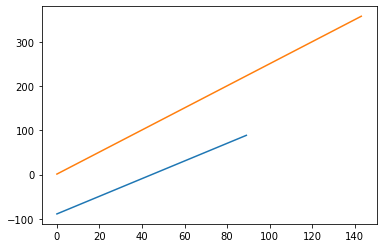

In [36]:
# reading file(s)
filename = fnames[0]
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
plt.plot(lats)
plt.plot(lons)
# cropping the study area out
l_lat,u_lat,lat_gcm=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm=uu.find_bounds(lons,data_bounds[0],data_bounds[2])

for i in range(len(fnames)):
  filename = fnames[i]
  fh = Dataset(filename, mode='r')
  lons = fh.variables['lon'][:]
  lats = fh.variables['lat'][:]
  #print(fh)
  data = fh.variables['tas'][:,l_lat:u_lat+1,l_lon:u_lon+1].data 

  if i==0:
    # starts at 1901
    data_gcm_daily=data[365:,:,:]
  else:
    data_gcm_daily=np.concatenate((data_gcm_daily,data),axis=0)
data_gcm_daily=uu.add_leap_years_sts(data_gcm_daily,st,en)[0]

# Others

DatetimeIndex(['1900-01-01', '1900-01-02', '1900-01-03', '1900-01-04',
               '1900-01-05', '1900-01-06', '1900-01-07', '1900-01-08',
               '1900-01-09', '1900-01-10',
               ...
               '2005-12-22', '2005-12-23', '2005-12-24', '2005-12-25',
               '2005-12-26', '2005-12-27', '2005-12-28', '2005-12-29',
               '2005-12-30', '2005-12-31'],
              dtype='datetime64[ns]', length=38716, freq='D')

(38716, 96, 192) (38716,) 38690
20089 == 20075


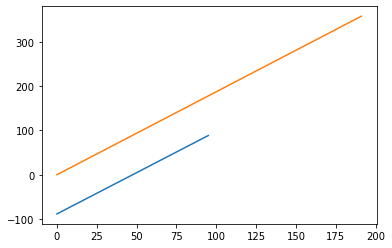

In [106]:
path_gcm  = "/media/vikram/One Touch/New CMIP5/"

gcm_name='MRI_ESM1'
filename = path_gcm + 'MRI_ESM1/tas_day_MRI-ESM1_historical_r1i1p1_19010101-20051231.nc'
st_gcm=1901

gcm_name='ACCESS1_0'
filename = path_gcm + 'ACCESS1_0/tas_day_ACCESS1-0_historical_r1i1p1_19000101-20051231.nc'
st_gcm=1900


gcm_name='NorESM1_M'
filename = path_gcm + 'NorESM1_M/tas_day_NorESM1-M_historical_r1i1p1_19000101-20051231.nc'
st_gcm=1900


gcm_name='CM5A_LR'
filename = path_gcm + 'CM5A_LR/tas_day_IPSL-CM5A-LR_historical_r1i1p1_19000101-20051231.nc'
st_gcm=1900


gcm_name='CNRM_CM5'
filename = path_gcm + 'CNRM_CM5/tas_day_CNRM-CM5_historical_r1i1p1_19000101-20051231.nc'
st_gcm=1900


gcm_name='MPI_ESM_MR'
filename = path_gcm + 'MPI_ESM_MR/tas_day_MPI-ESM-MR_historical_r1i1p1_19000101-20051231.nc'
st_gcm=1900


fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
plt.plot(lats)
plt.plot(lons)
# cropping the study area out
l_lat,u_lat,lat_gcm=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm=uu.find_bounds(lons,data_bounds[0],data_bounds[2])

# cropping years before 1901


date_gcms = pd.date_range(start=str(st_gcm) + "/01/01",end="2005/12/31",freq = "D")
print(fh.variables['tas'].shape,date_gcms.shape,365*(2005 - st_gcm+1))

dt_data_st=np.datetime64(str(st_gcm)+'-01-01')
dt_st=np.datetime64(str(st)+'-01-01')
index_of_st=((dt_st- dt_data_st) / np.timedelta64(1, 'D')).astype(int)

# index_of_st=(st- st_gcm) *365



data_gcm_daily = fh.variables['tas'][index_of_st:,l_lat:u_lat+1,l_lon:u_lon+1].data
print(data_gcm_daily.shape[0],"==",365*55)
# data_gcm_daily=uu.add_leap_years_sts(data_gcm_daily,st,en)[0]

In [108]:
print(data_gcm_daily.shape[0],"==",365*55)


20089 == 20075


## split data

In [109]:
data_imd_obs = uu.remove_leap_years_sts(tas_obs,st,en)[0]

In [110]:
yr_split = 1976
Nyears_train = yr_split - st 
Nyears_test =  en -  st +1

data_obs_imd_train = data_imd_obs[:365*Nyears_train,:,:]
data_obs_imd_pred = data_imd_obs

print(data_imd_obs.shape,data_obs_imd_train.shape,data_obs_imd_pred.shape)

(20075, 31, 31) (9125, 31, 31) (20075, 31, 31)


In [111]:
data_gcm_daily = uu.remove_leap_years_sts(data_gcm_daily,st,en)[0]
data_gcm_train = data_gcm_daily[:365*Nyears_train,:,:]
data_gcm_pred = data_gcm_daily[:,:,:]

print(data_gcm_daily.shape,data_gcm_train.shape,data_gcm_pred.shape)

(20075, 20, 21) (9125, 20, 21) (20075, 20, 21)


# Writing outputs

In [112]:
# path_out = '/home/vikram/BCSD_data/India_T_BCSDd_eqm/'
# !mkdir '/home/vikram/BCSD_data/India_T_BCSDd_eqm/'

path_out = '/home/vikram/BCSD_data/India_T_BCSDd/'
# !mkdir '/home/vikram/BCSD_data/India_T_BCSDd/'

In [113]:
path_out

'/home/vikram/BCSD_data/India_T_BCSDd/'

In [114]:
gcm_name

'MPI_ESM_MR'

In [115]:
np.save(path_out + '/data_obs_imd_train',data_obs_imd_train)


data_obs_imd_pred_coarse=np.zeros((data_obs_imd_pred.shape[0],data_gcm_pred.shape[1],data_gcm_pred.shape[2]))
for i in range(data_obs_imd_pred.shape[0]):
    data_obs_imd_pred_coarse[i,:,:]=uu.regrid(data_obs_imd_pred[i,:,:],lat_obs,lon_obs,lat_gcm,lon_gcm)

np.save(path_out + '/data_obs_imd_'+gcm_name+'_pred_coarse',data_obs_imd_pred_coarse)
np.save(path_out + '/data_obs_imd_pred',data_obs_imd_pred)
np.save(path_out + '/data_gcm_'+gcm_name+'_imd_pred',data_gcm_pred)
np.save(path_out + '/data_gcm_'+gcm_name+'_imd_train',data_gcm_train)

                          
                          
metadata={'st':st,
     'en':en,
     'Nyears_train':Nyears_train,
     'Nyears_test':Nyears_test,
     'mask':mask_fine_obs,
     'data_bounds':data_bounds,
     'path_out':path_out,
     'lat_obs':lat_obs,
     'lat_gcm':lat_gcm,
     'lon_obs':lon_obs,
     'lon_gcm':lon_gcm}     
     
np.save(path_out + '/bcsd_imd_metadata_'+gcm_name,metadata)


In [116]:
path_out

'/home/vikram/BCSD_data/India_T_BCSDd/'